<a href="https://colab.research.google.com/github/trinadhmatta2123/OIBSIB/blob/main/task4-Android%20App%20Market/Oasis4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install textblob


In [2]:
pip install nltk


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [4]:
file_path = '/content/drive/MyDrive/apps.csv'
data = pd.read_csv(file_path)

cleaning and correction

In [5]:
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data['Size'] = data['Size'].astype(str).replace('Varies with device', np.nan)
data['Size'] = data['Size'].str.replace('M', '').str.replace('k', '')
data['Size'] = pd.to_numeric(data['Size'], errors='coerce')
data['Size'] = data['Size'].apply(lambda x: x / 1000 if x > 1000 else x)  # Convert k to M
data['Price'] = data['Price'].str.replace('$', '').astype(float)
data['Last Updated'] = pd.to_datetime(data['Last Updated'])

In [6]:
# Drop rows with missing values
data = data.dropna()


In [7]:
def get_sentiment(review):
    return TextBlob(review).sentiment.polarity

# sentiment analysis on the 'Reviews' column
data['Sentiment'] = data['Reviews'].astype(str).apply(get_sentiment)

visualize

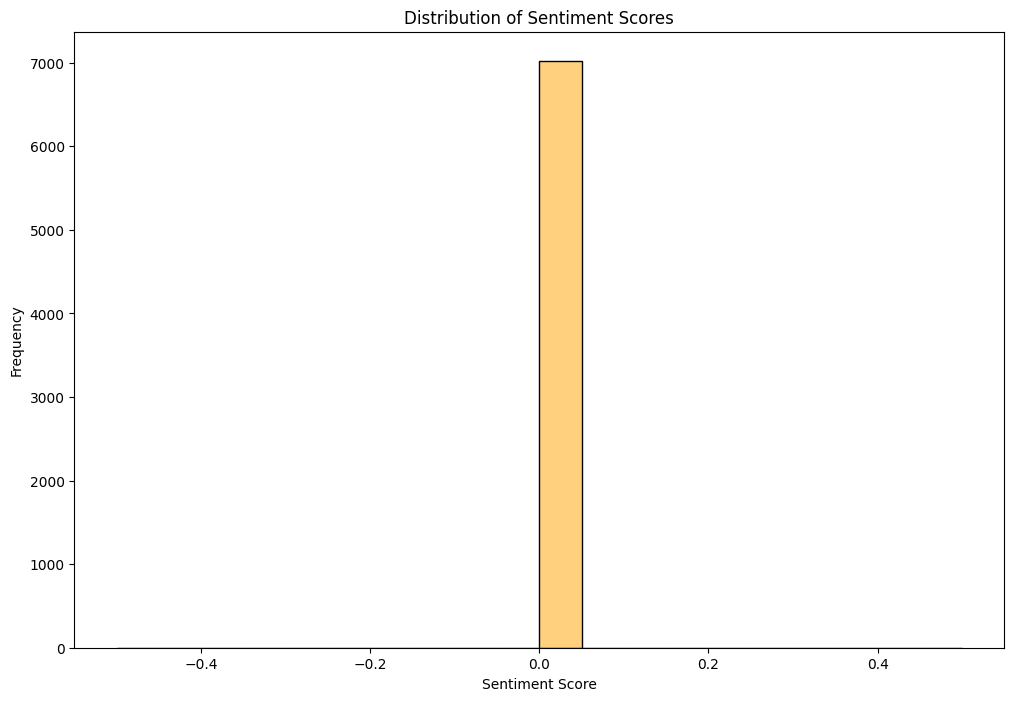

In [8]:
plt.figure(figsize=(12, 8))
sns.histplot(data['Sentiment'], bins=20, kde=True, color='orange')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

<ipython-input-9-c503d24268b5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


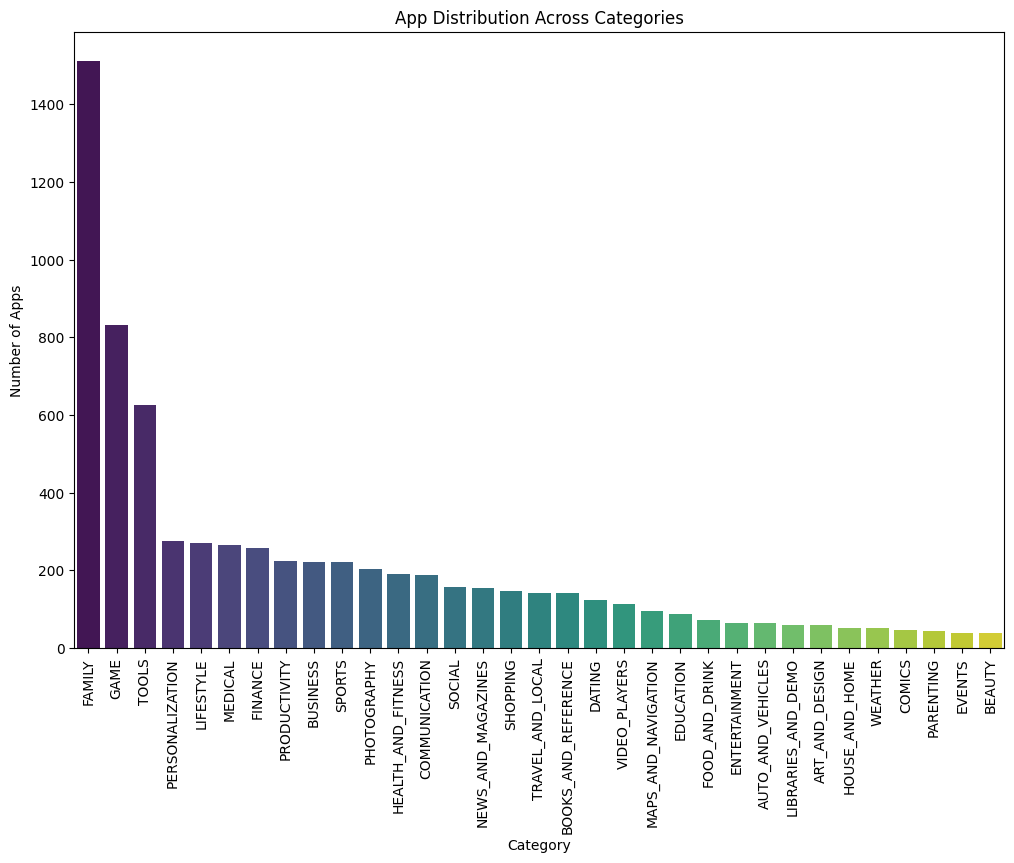

In [9]:
category_counts = data['Category'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('App Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()

Metrics Analysis:

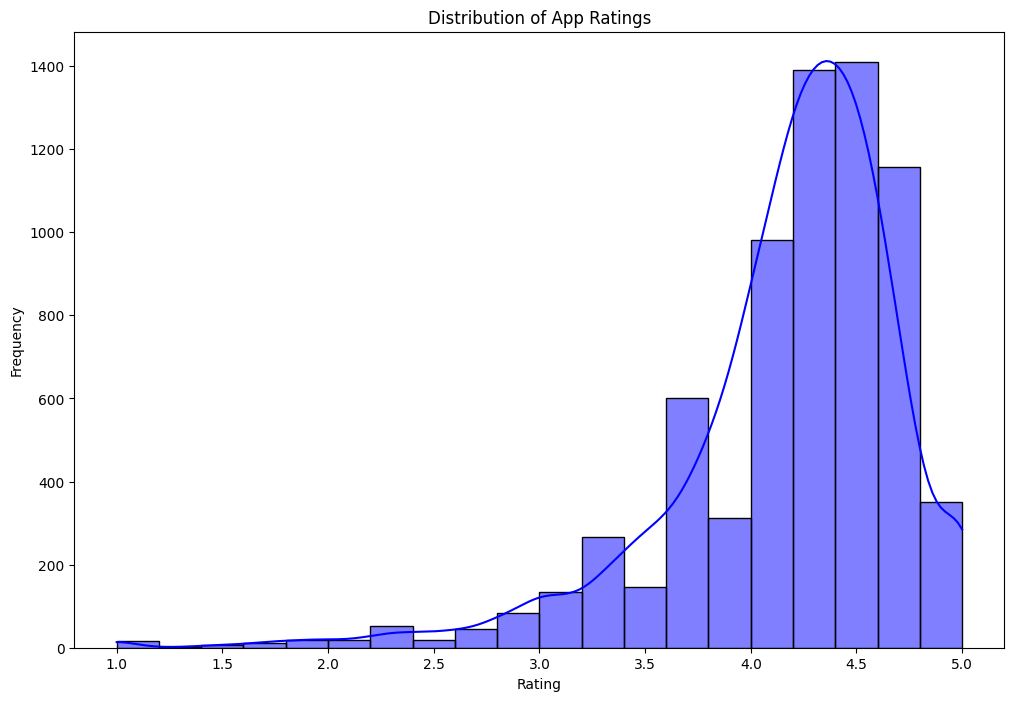

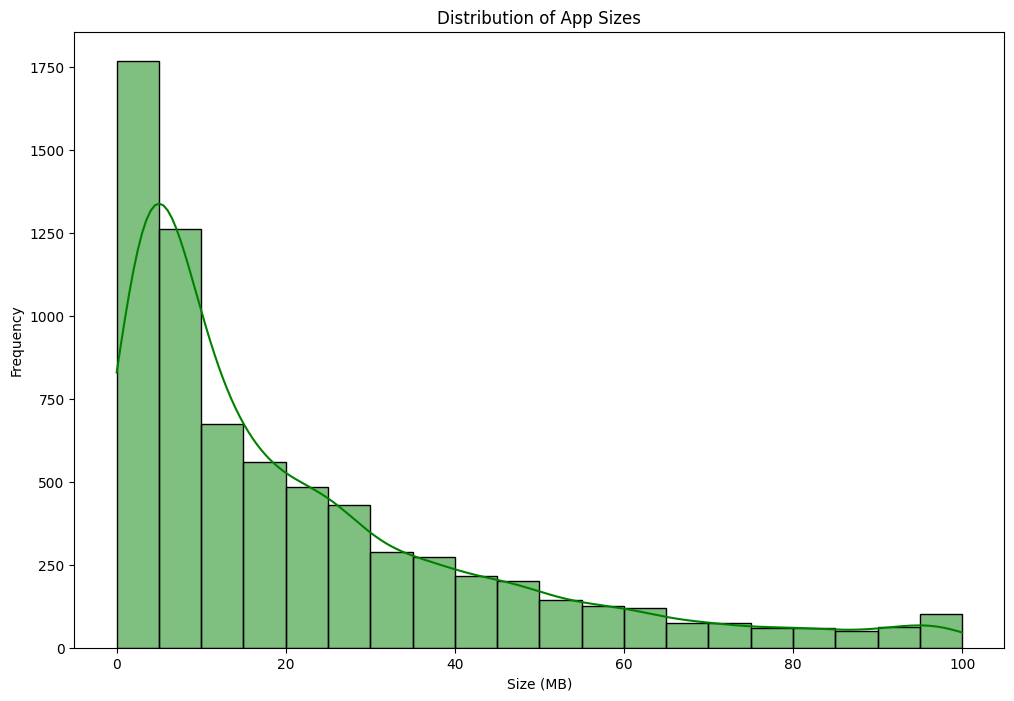

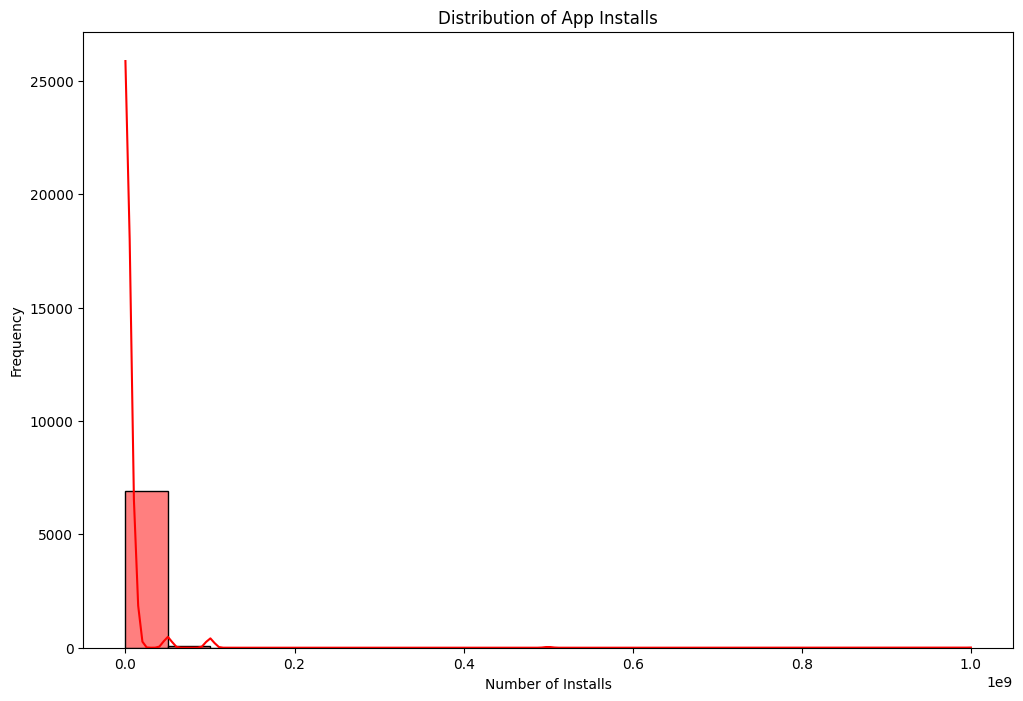

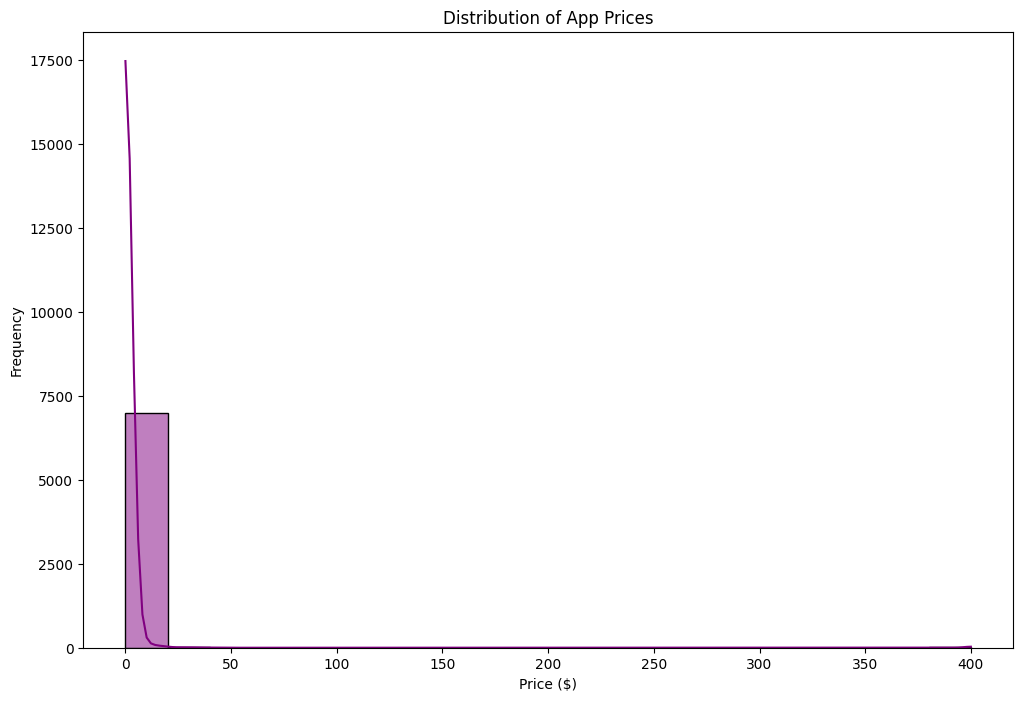

In [10]:
plt.figure(figsize=(12, 8))
sns.histplot(data['Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data['Size'], bins=20, kde=True, color='green')
plt.title('Distribution of App Sizes')
plt.xlabel('Size (MB)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data['Installs'].str.replace(',', '').str.replace('+', '').astype(int), bins=20, kde=True, color='red')
plt.title('Distribution of App Installs')
plt.xlabel('Number of Installs')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data['Price'], bins=20, kde=True, color='purple')
plt.title('Distribution of App Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

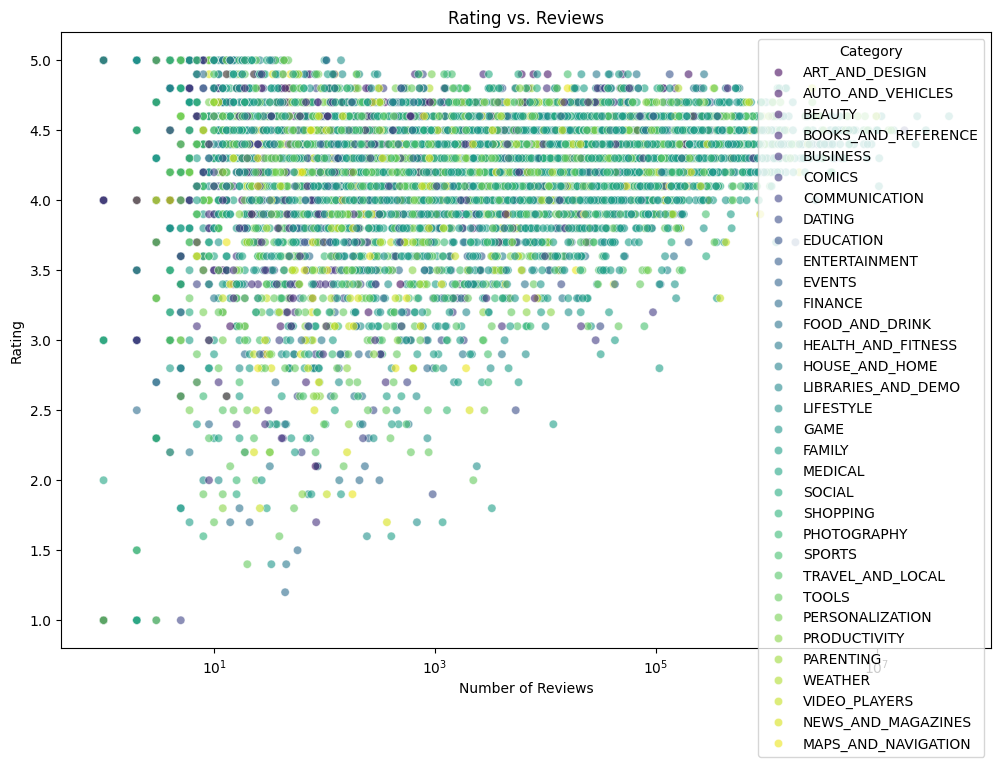

In [11]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Reviews', y='Rating', data=data, hue='Category', palette='viridis', alpha=0.6)
plt.title('Rating vs. Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.xscale('log')
plt.show()

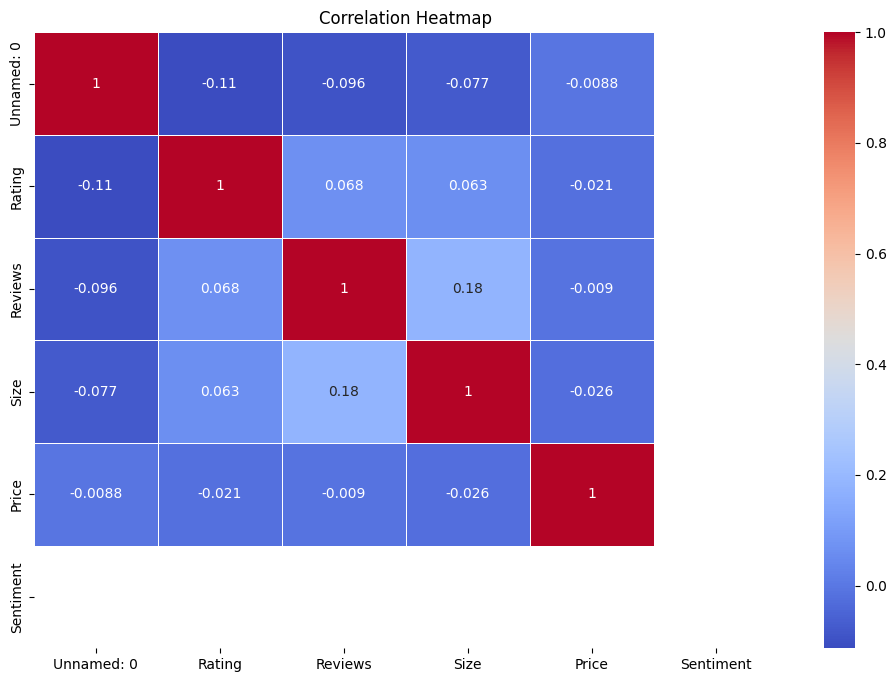

In [12]:
plt.figure(figsize=(12, 8))
numerical_data = data.select_dtypes(include=[np.number])
corr = numerical_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()